# Analysis

In [1]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set path to load files from
res_path = '/Users/tom/Documents/GitCode/Confidence_Scanner/scripts/results/'

In [3]:
# Load files
dfs = []
for dat_type in ['Papers', 'PRs']:
    
    d1 = pd.read_csv(os.path.join(res_path, dat_type + '_readability.csv'))
    d2 = pd.read_csv(os.path.join(res_path, dat_type + '_analysis.csv'))
    
    # Merge dataframes
    df = pd.merge(d1, d2, on=['id', 'term'])
    df['dat_type'] = dat_type
    
    dfs.append(df)

In [17]:
# Combine into one joint df, with all data (papers and press releases)
df = pd.concat(dfs)

In [18]:
# Clean up df
df.set_index('id', inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

# Drop currently empty columns
df.drop('liu', axis=1, inplace=True)
df.drop('subj', axis=1, inplace=True)

In [19]:
# Check out a few rows
df.head()

,term,fk,smog,consen,ar,vader,liwc,dat_type
id,,,,,,,,
29373119,autism,15.2,16.6,16th and 17th grade,18.2,1.0194,6,Papers
29369294,autism,17.7,18.2,17th and 18th grade,22.2,-2.5924,6,Papers
29367178,autism,13.1,15.1,15th and 16th grade,14.8,0.9111,8,Papers
29361396,autism,19.8,21.3,17th and 18th grade,23.7,-0.9329,0,Papers
29358944,autism,16.5,17.3,16th and 17th grade,18.5,0.0173,6,Papers


In [7]:
# Check how many there are of each data type
df['dat_type'].value_counts()

Papers    9913
PRs       5701
Name: dat_type, dtype: int64

In [20]:
# Check how many documents there are for each term
df['term'].value_counts()

diabetes         2577
stroke           1994
perception       1689
vaccines         1421
dementia         1320
cognition        1314
autism           1280
hypertension     1245
epilepsy         1079
consciousness    1035
optogenetics      660
Name: term, dtype: int64

In [21]:
# Check how many of each document there are, split up by document type and term
df.groupby(['dat_type', 'term']).size()

dat_type  term         
PRs       autism            324
          cognition         348
          consciousness      81
          dementia          393
          diabetes         1707
          epilepsy          202
          hypertension      339
          optogenetics       54
          perception        709
          stroke           1084
          vaccines          460
Papers    autism            956
          cognition         966
          consciousness     954
          dementia          927
          diabetes          870
          epilepsy          877
          hypertension      906
          optogenetics      606
          perception        980
          stroke            910
          vaccines          961
dtype: int64

In [22]:
# Descriptive statistics
df.describe()

,fk,smog,ar,vader,liwc
count,15614.000000,15614.000000,15614.000000,15614.000000,15614.000000
mean,13.951383,15.322333,17.077732,0.663462,3.640387
std,2.868373,2.429624,3.350152,2.662940,5.440099
min,-3.500000,0.000000,2.100000,-15.723300,-30.000000
25%,12.200000,14.000000,15.000000,-0.656400,0.000000
50%,13.900000,15.300000,17.000000,0.547100,3.000000
75%,15.700000,16.800000,19.000000,1.828325,6.000000
max,54.800000,26.200000,68.500000,40.804400,47.000000


In [23]:
# Check correlation between metrics
corrs = df.corr()
corrs

,fk,smog,ar,vader,liwc
fk,1.000000,0.792929,0.892520,0.053839,-0.014694
smog,0.792929,1.000000,0.665313,0.060999,0.006387
ar,0.892520,0.665313,1.000000,0.045978,-0.009467
vader,0.053839,0.060999,0.045978,1.000000,0.171066
liwc,-0.014694,0.006387,-0.009467,0.171066,1.000000


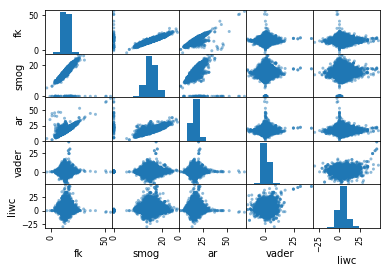

In [24]:
# Plot relations between metrics
pd.plotting.scatter_matrix(df);

In [25]:
# Check the average scores for each measure across different terms
avgs = df.groupby(['term', 'dat_type']).mean()
avgs

fk       smog         ar     vader      liwc
term          dat_type                                                     
autism        PRs       13.894753  15.287037  17.039198  1.873936  6.166667
              Papers    14.839226  16.020816  18.008159  0.227157  2.967573
cognition     PRs       13.748276  15.192241  16.887644  2.303509  4.902299
              Papers    14.924741  16.123602  17.990683  0.509583  2.940994
consciousness PRs       13.870370  15.144444  17.058025 -0.247636  4.703704
              Papers    14.133438  15.570755  17.203249 -0.086092  2.538784
dementia      PRs       13.878880  15.245547  16.984733  1.511871  5.374046
              Papers    14.215318  15.703560  17.230313  0.436985  2.827400
diabetes      PRs       13.702402  15.029760  16.936907  1.180341  5.495606
              Papers    13.075057  14.739310  15.955977  0.344294  3.171264
epilepsy      PRs       13.310891  14.705941  16.451980  1.284662  5.396040
              Papers    13.748233  15.049715  17.183694  0.268929  2.631699
hypertension  PRs       13.832743  15.099705  17.081711  0.490596  5.884956
              Papers    12.912583  14.529139  15.923068  0.042915  3.083885
optogenetics  PRs       13.840741  15.281481  16.909259  2.554909  5.981481
              Papers    16.568812  17.197525  19.542739  0.625489  2.077558
perception    PRs       13.681241  15.021298  16.804090  1.960479  2.984485
              Papers    14.230816  15.699898  17.101939  0.585642  2.910204
stroke        PRs       13.572048  14.745295  16.907565  0.417177  4.972325
              Papers    12.730440  14.499121  15.903297  0.049812  3.172527
vaccines      PRs       13.428913  14.900000  16.553043  1.469861  5.486957
              Papers    14.464516  15.854735  17.659313  0.701879  2.336108

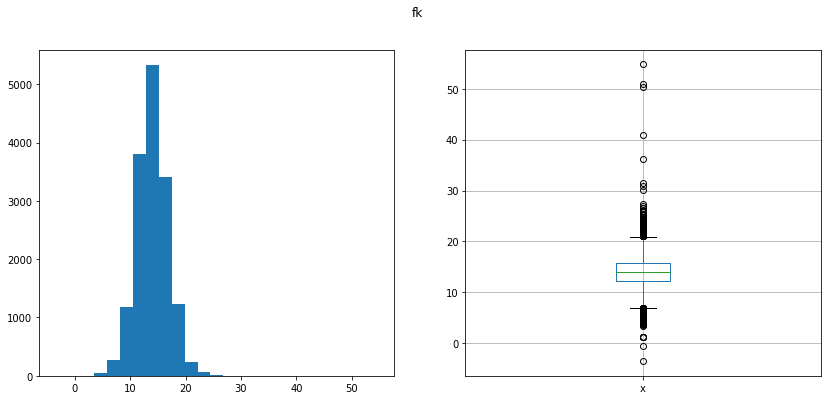

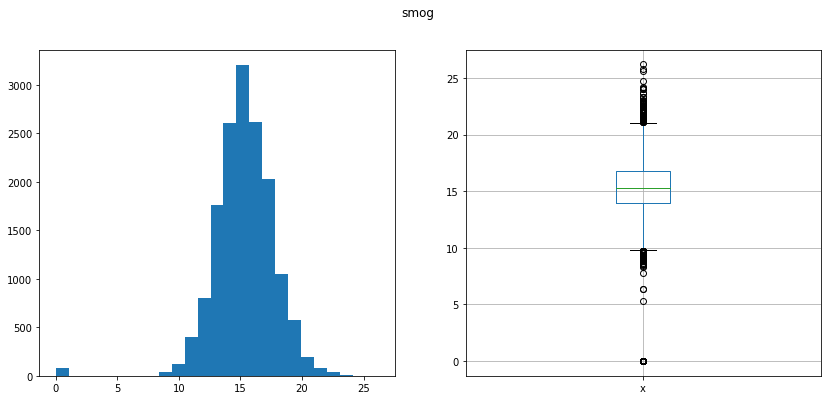

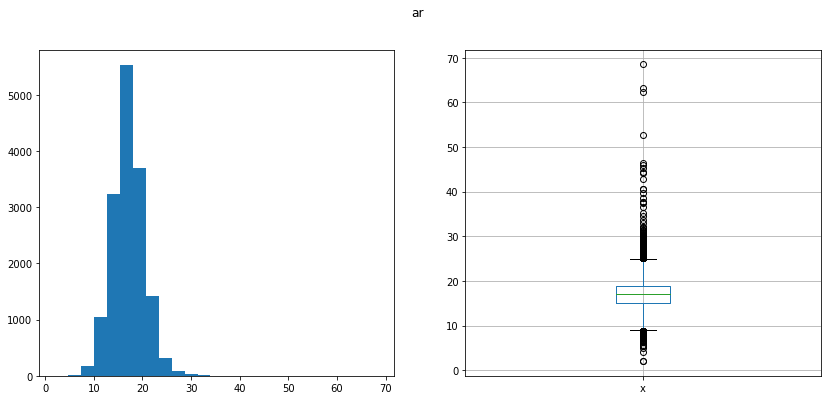

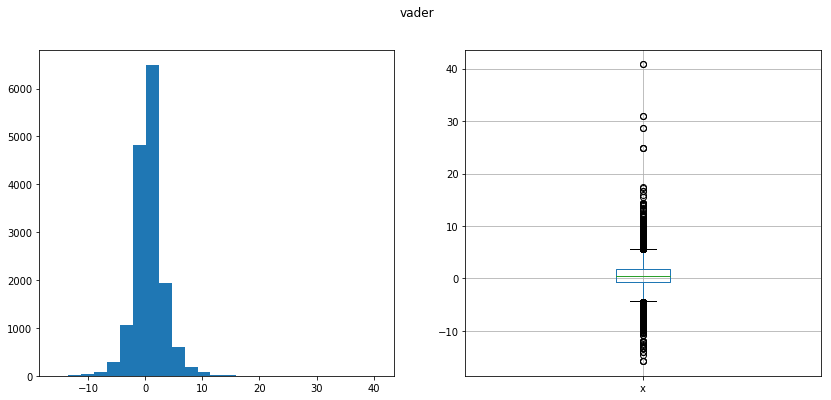

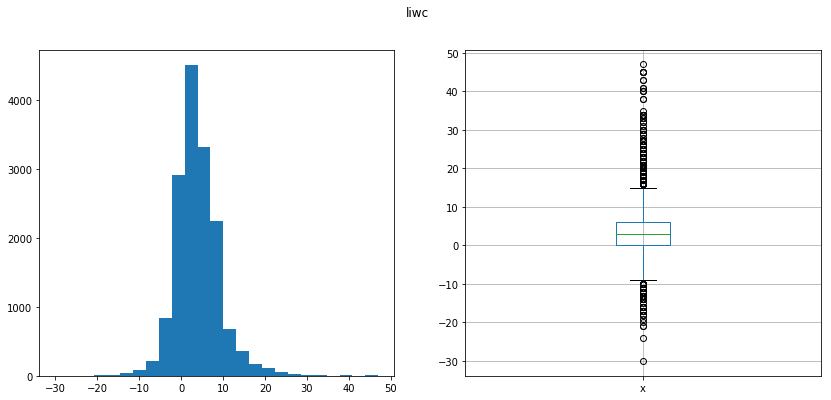

In [26]:
# Plot
for metric in ['fk', 'smog', 'ar', 'vader', 'liwc']:
    fig, ax = plt.subplots(1, 2, figsize=[14, 6])
    plt.suptitle(metric)
    ax[0].hist(df[metric], bins=25);
    pd.plotting.boxplot(df[metric], ax=ax[1]);

In [27]:
# Check the average differences between data types
df.groupby('dat_type').mean()

,fk,smog,ar,vader,liwc
dat_type,,,,,
PRs,13.676390,15.000263,16.882828,1.241859,5.089633
Papers,14.109533,15.507556,17.189821,0.330823,2.806920
